<a href="https://colab.research.google.com/github/alexunderch/Master_materials/blob/main/gpaphs_and_nets/%D0%9C%D0%A2%D0%98%D0%98_%D0%B3%D1%80%D0%B0%D1%84%D1%8B_%D0%B4%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание 1

In [ ]:
import networkx as nx

In [ ]:
!wget https://raw.githubusercontent.com/alexunderch/Master_materials/main/gpaphs_and_nets/netscience.gml
!wget https://github.com/alexunderch/Master_materials/raw/main/gpaphs_and_nets/top5_betwennessCentrality.png
!wget https://github.com/alexunderch/Master_materials/raw/main/gpaphs_and_nets/top5_pageRank.png

Скачайте graphml файл “Coauthorships in network science” с описанием соавторства статей исследователями сложных сетей и импортируйте его в Gephi как 
неориентированный граф.

Изобразите его (целиком или какую-то “главную часть”) с помощью Gephi силовым алгоритмом, сделав размер вершин на рисунке пропорциональным их PageRank’у. `default: p =.85, eps = 0.001`
<figure>
<center>
<img src='https://github.com/alexunderch/Master_materials/raw/main/gpaphs_and_nets/netscience_gephi.jpg' \>
<figcaption>Gephi</figcaption></center>
</figure>



Сколько вершин в графе имеют наибольший эксцентриситет? `(8, эксцентриситет = 17)`

Найдите TOP-5 вершин с наибольшей betweenness centrality. Какие из этих вершин 
не входят в TOP-5 вершин по PageRank? 


<figure>
<center>
<img src='https://github.com/alexunderch/Master_materials/raw/main/gpaphs_and_nets/top5_betwennessCentrality.png' \>
<figcaption>Top-5 in betwenness centrality</figcaption></center>
</figure>


<figure>
<center>
<img src='https://github.com/alexunderch/Master_materials/raw/main/gpaphs_and_nets/top5_pageRank.png' \>
<figcaption>эти же Top-5 in PageRank</figcaption></center>
</figure>

Найдите количество компонент связности в графе `396`

## Часть 1: анализ графа

Откройте с помощью `networkx.read_gml` файл `netscience.gml` из задания на Gephi, при этом не указывайте при импорте “label=None”, чтобы нормально загрузились имена учёных — метки вершин.

In [ ]:
# ваш код тут
netscience_graph = nx.read_gml("netscience.gml", )

Средствами `networkx` выведите (сделайте `print` количество вершин и рёбер графа.

In [ ]:
# ваш код тут
print(f"# of vertexes = {netscience_graph.number_of_nodes()}")
print(f"# of edges = {netscience_graph.number_of_edges()}")

# of vertexes = 1589
# of edges = 2742


Средствами `networkx` найдите количество вершин в самой большой компоненте связности графа.

In [ ]:
# ваш код тут
giant = netscience_graph.subgraph(
    sorted(nx.connected_components(netscience_graph), key=len, reverse=True)[0]
    )
print(f"# of vertexes in the largest connected component {giant.number_of_nodes()}")

# of vertexes in the largest connected component 379


In [ ]:
e = nx.eccentricity(giant)
eccentricity = e[list(sorted(e, key=e.get, reverse=True))[0]]
n = 0
print(f"maximum eccentricity = {eccentricity}")
for key in sorted(e, key=e.get, reverse=True):
    if e[key] == eccentricity:
        n+=1
    else: break
print(f"# vertexes with such eccentricity = {n} ")

maximal eccentricity = 17
# vertexes with such eccentricity = 8 


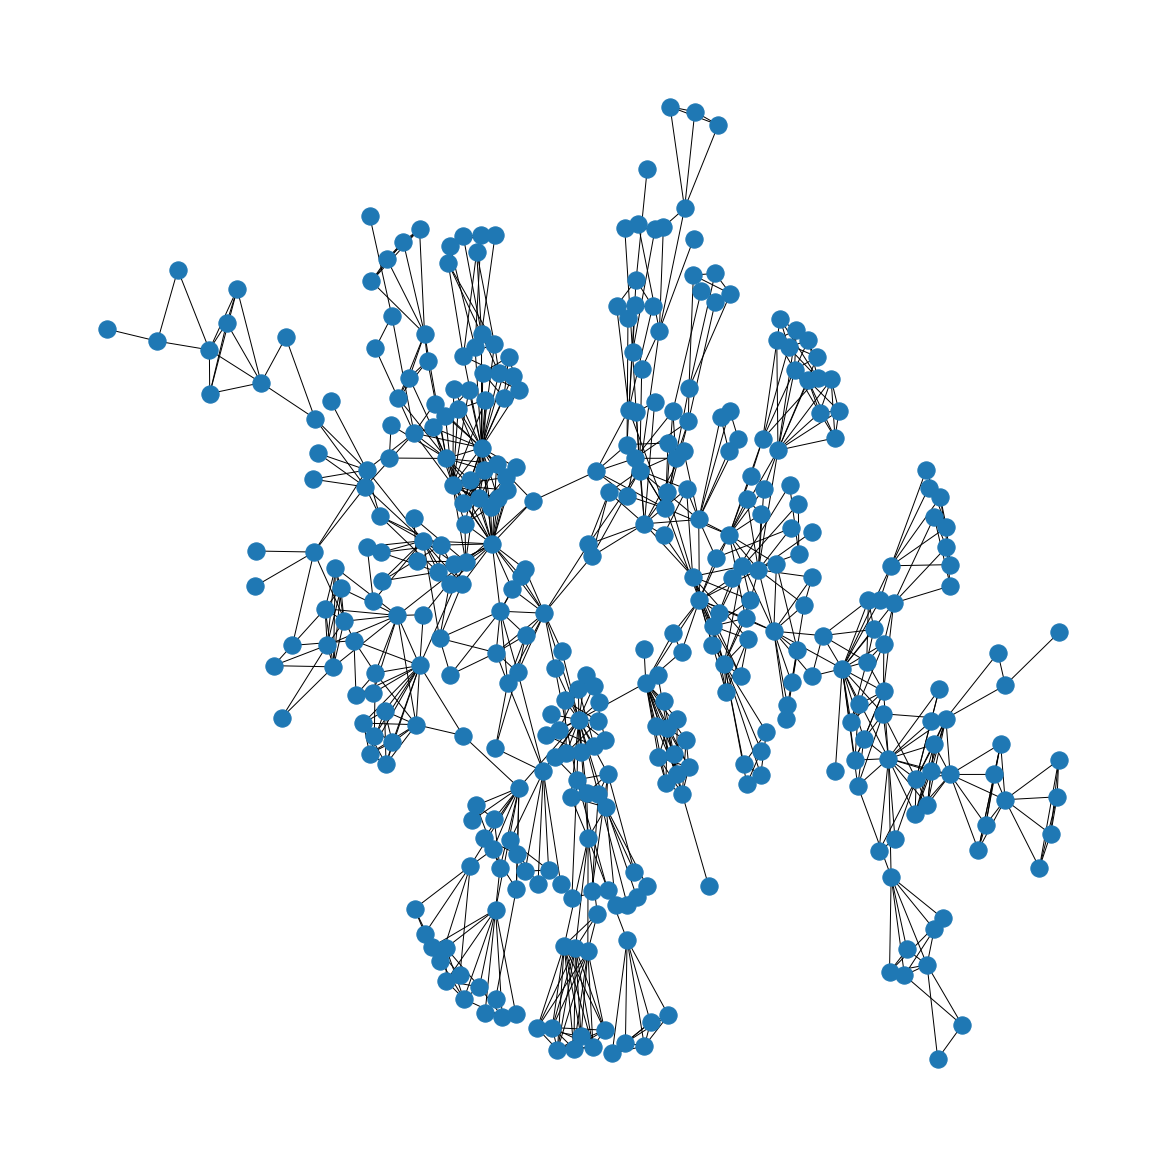

In [ ]:
plt.figure(3, figsize=(16, 16)) 
nx.draw_kamada_kawai(giant)
plt.show()

Сколько изолированных вершин в графе?

In [ ]:
# ваш код тут
print(f"# of isolated vertexes {len(list(nx.isolates(netscience_graph)))}")

# of isolated vertexes 128


Нарисуйте с помощью `networkx.draw_spring` единственную 21-вершинную компоненту связности графа. Может пригодиться метод `subgraph`, возвращающий подграф заданного графа, порождённый заданным множеством вершин.

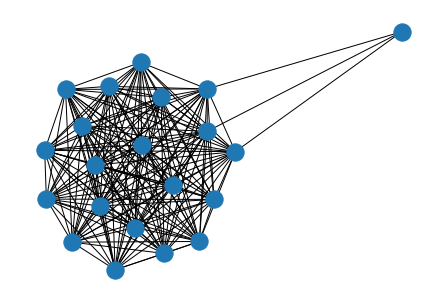

In [ ]:
# ваш код тут
for component in sorted(nx.connected_components(netscience_graph), key=len, reverse=True):
    subgraph = netscience_graph.subgraph(component)
    if subgraph.number_of_nodes() == 21:
        nx.draw_spring(netscience_graph.subgraph(
            subgraph
        ))
        break

Найдите с помощью networkx (см. [документацию](https://networkx.github.io/documentation/stable/reference/algorithms/clique.html)) размер максимальной клики в упомянутой выше 21-вершинной компоненте связности.

In [ ]:
# ваш код тут
clique = sorted(nx.find_cliques(subgraph), key = len, reverse = True)
print(f"# vertexes of maximum clique in 21-v connected component {len(clique[0])}")

# vertexes of maximum clique in 21-v connected component 20


## Часть 2: построение графа

Создайте с нуля (только с помощью `add_nodes_from` и `add_edges_from`) граф типа `lollipop` (но без использования встроенной в `networkx` функции `lollipop_graph`) — клику на 10 вершинах, к которой приделана цепь на 6 вершинах. Нарисуйте этот граф наиболее подходящим по Вашему мнению алгоритмом, предоставляемым `networkx` — поэкспериментируйте.


In [ ]:
# ваш код тут
#https://pelegm-networkx.readthedocs.io/en/latest/_modules/networkx/generators/classic.html#lollipop_graph
m, n = 10, 6
import itertools
#complete graph
C = nx.empty_graph(m)
edges = itertools.combinations(range(m), 2)
C.add_edges_from(edges)
#chain graph
n_nodes = list(range(m, m + n))
P = nx.empty_graph(n_nodes)
P.add_edges_from(nx.utils.pairwise(n_nodes))
#connection
C.add_nodes_from(P.nodes())
C.add_edges_from(P.edges())
C.add_edge(m - 1, n_nodes[0])

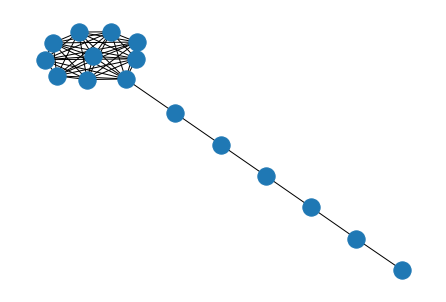

In [ ]:
nx.draw_kamada_kawai(C)

Создайте граф, который получается из цикла на 10 вершинах добавлением одного ребра между какой-нибудь парой диаметрально противоположных вершин. Нарисуйте этот граф наиболее подходящим по Вашему мнению алгоритмом, предоставляемым networkx — поэкспериментируйте.

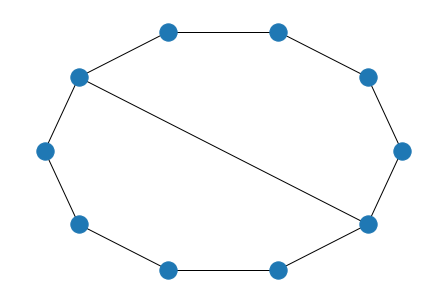

In [ ]:
# ваш код тут
n_ = 10

import random
random.seed(42112)

idx = random.randint(0, n_ - 1)

G = nx.empty_graph(m)
G.add_edges_from(nx.utils.pairwise(range(n_)))
G.add_edge(0, n_ - 1)
G.add_edge(idx, (idx + n_ // 2) % n_)


nx.draw_shell(G)

## Часть 3: жадный алгоритм раскраски

Найдите для заданного `networkx`-графа $G$ раскраску не более, чем в $\Delta(G)$ цветов с помощью рассказанного на лекции «жадного» алгоритма. Технически раскраска — это словарь, в котором для каждой вершины указан её номер цвета от $1$ до $\Delta(G)$.

In [ ]:
import itertools
from typing import Callable

def greedy_coloring(G: nx.Graph, heuristics: Callable = None) -> dict:
    """"""
    if len(G) == 0:
        return {}

    colors = dict()

    if heuristics is not None:
        nodes = heuristics(G, colors)
    else:
        nodes = G.nodes()

    for u in nodes:
        # Set to keep track of colors of neighbours
        neighbour_colors = {colors[v] for v in G[u] if v in colors}
        # Find the first unused color.
        for color in itertools.count(1):
            if color not in neighbour_colors:
                break
        # Assign the new color to the current node.
        colors[u] = color
    return colors

Нумерация нод графа может быть задана произвольно или специально, что создаёт проблему неоптимальности раскраски графа, поэтому можно поэкспериментировать с порядком выбора вершин: 

1. рассмотреть вершины по возрастанию или убыванию их степени, потому что казалось бы естественным раскрасить такие вершины, потому у них больше соседей или, наоборот, нет соседей, в один цвет;

2. рассмотреть сначала независимые множества графа;
3. случайно перемешать вершины, а вдруг повезёт;
4. Рассмотреть вершины, идущие в порядке поиска в графе в ширину (`bfs`) или в глубину (`dfs`) – это даст иерархический порядок раскраске
5. Применить алогритм раскраски "с перекрашиваниями" — взята готовая реализация.
```
 Maciej M. Syslo, Narsingh Deo, Janusz S. Kowalik,
       Discrete Optimization Algorithms with Pascal Programs, 415-424, 1983.
       ISBN 0-486-45353-7.
```

In [ ]:
from typing import Dict, Union
import numpy as np
import random
from collections import defaultdict, deque
from functools import partial

def by_largest_degree(G: nx.Graph, colors: Dict):
    return sorted(G, key=G.degree, reverse=True)



def by_random_permutation(G: nx.Graph, colors: Dict, seed=None):
    np.random.seed(seed)
    random.seed(seed)
    nodes = list(G)
    np.random.shuffle(nodes)
    return nodes



def by_smallest_degree(G: nx.Graph, colors: Dict):
    H = G.copy()
    result = deque()

    # Build initial degree list (i.e. the bucket queue data structure)
    degrees = defaultdict(set)  # set(), for fast random-access removals
    lbound = float("inf")
    for node, d in H.degree():
        degrees[d].add(node)
        lbound = min(lbound, d)  # Lower bound on min-degree.

    def find_min_degree():
        # Save time by starting the iterator at `lbound`, not 0.
        # The value that we find will be our new `lbound`, which we set later.
        return next(d for d in itertools.count(lbound) if d in degrees)

    for _ in G:
        # Pop a min-degree node and add it to the list.
        min_degree = find_min_degree()
        u = degrees[min_degree].pop()
        if not degrees[min_degree]:  # Clean up the degree list.
            del degrees[min_degree]
        result.appendleft(u)

        # Update degrees of removed node's neighbors.
        for v in H[u]:
            degree = H.degree(v)
            degrees[degree].remove(v)
            if not degrees[degree]:  # Clean up the degree list.
                del degrees[degree]
            degrees[degree - 1].add(v)

        # Finally, remove the node.
        H.remove_node(u)
        lbound = min_degree - 1  # Subtract 1 in case of tied neighbors.

    return result

def by_independent_sets(G: nx.Graph, colors: Dict):
    def _maximal_independent_set(G):
        """Returns a maximal independent set of nodes in ``G`` by repeatedly
        choosing an independent node of minimum degree (with respect to the
        subgraph of unchosen nodes).

        """
        result = set()
        remaining = set(G)
        while remaining:
            G = G.subgraph(remaining)
            v = min(remaining, key=G.degree)
            result.add(v)
            remaining -= set(G[v]) | {v}
        return result

    remaining_nodes = set(G)
    while len(remaining_nodes) > 0:
        nodes = _maximal_independent_set(G.subgraph(remaining_nodes))
        remaining_nodes -= nodes
        yield from nodes




def by_connected_sequential(G: nx.Graph, colors: Dict, traversal: str = "bfs"):
    if traversal == "bfs":
        traverse = nx.bfs_edges
    elif traversal == "dfs":
        traverse = nx.dfs_edges
    for component in (G.subgraph(c) for c in nx.connected_components(G)):
        source = list(component.nodes())[0]

        yield source
        for (_, end) in traverse(G.subgraph(component), source):
            yield end


Heuristics = {
    "largest_first": by_largest_degree,
    "random_sequential": by_random_permutation,
    "smallest_last": by_smallest_degree,
    "independent_set": by_independent_sets,
    "connected_sequential": by_connected_sequential
}

specific_kwargs = {
    "random_sequential": {"seed": 35},
    "connected_sequential": {"traversal": "dfs"}
}

interchangeable_colouring = partial(nx.greedy_color, interchange = True,)
from time import time

def benchmark_graph(G: nx.Graph, interchange: bool = False,  only_colours = True) -> Dict:
    result = {k: 0 for k in Heuristics.keys()}
    oc = lambda x: max(x.values()) if only_colours else x
    for h_name, h in Heuristics.items():
       
        if interchange:
            try:
                start_time = time()
                result[h_name] = oc(interchangeable_colouring(G, strategy = h_name))
                print(f"{h_name} took {round(time() - start_time, 4)}, interchange={interchange}")
            except: 
                continue
        else: 
            start_time = time()
            result[h_name] = oc(greedy_coloring(G, heuristics = partial(h, **specific_kwargs.get(h_name, {}))))
            print(f"{h_name} took {round(time() - start_time, 4)}, interchange={interchange}")
    return result

In [ ]:
# Простой тест алгоритма раскраски (запустите перед отправкой):
G = nx.random_regular_graph(7, 500, 2020)

coloring = greedy_coloring(G, heuristics=by_connected_sequential)
assert (
    max(coloring.values()) <= 7
    and
    min(coloring.values()) >= 1
    and 
    all(coloring[u] != coloring[v] for u,v in G.edges())
)

In [ ]:
graphs = {
    "balanced_tree": nx.balanced_tree(r = 4, h = 6),
    "dorogovtsev_goltsev_mendes_graph": nx.dorogovtsev_goltsev_mendes_graph(n = 10),
    "lollipop": nx.lollipop_graph(15, 15),
    "star_graph": nx.star_graph(500),
    "turan_graph": nx.turan_graph(50, 20),
    "petersen_graph": nx.petersen_graph(),
    "karate_club_graph": nx.karate_club_graph(),
    "random_regular_graph": nx.random_regular_graph(7, 500, 2020)
}

balanced_tree


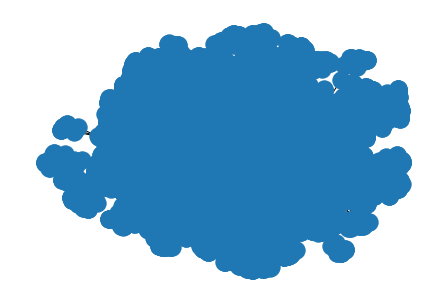

dorogovtsev_goltsev_mendes_graph


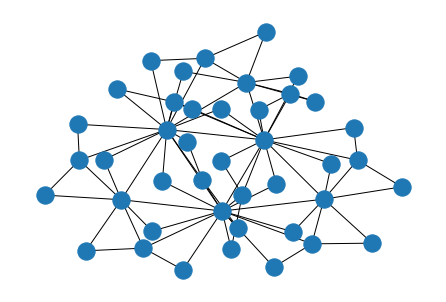

lollipop


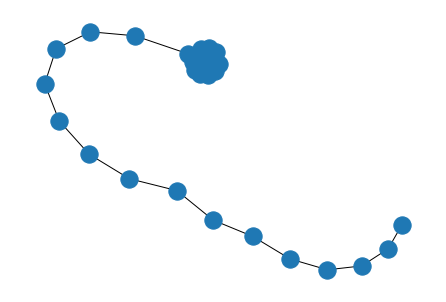

star_graph


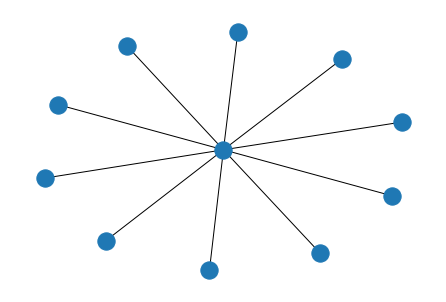

turan_graph


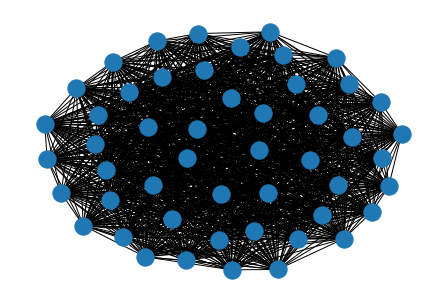

petersen_graph


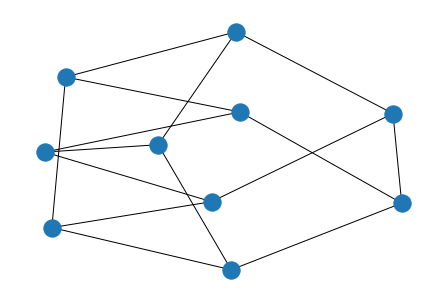

karate_club_graph


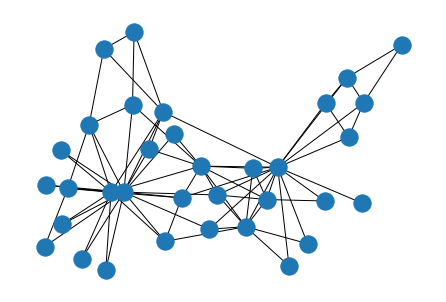

random_regular_graph


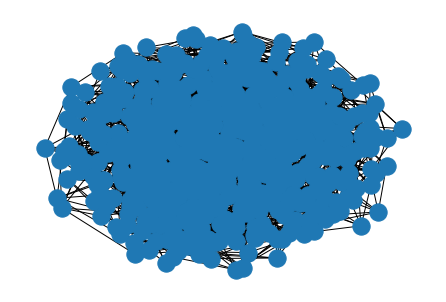

In [ ]:
import matplotlib.pyplot as plt

for gname, graph in graphs.items():
    #don't pay too much attention at layouts
    print(gname)
    nx.draw(graph)
    plt.show()

In [ ]:

for gname, graph in graphs.items():
    print(f"analysing {gname}")
    print("-"*30)
    for i in [False, True]:
        print(benchmark_graph(graph, interchange = i))
        print("-"*30)

analysing balanced_tree
------------------------------
largest_first took 0.0213, interchange=False
random_sequential took 0.0157, interchange=False
smallest_last took 0.0843, interchange=False
independent_set took 137.6356, interchange=False
connected_sequential took 0.0807, interchange=False
{'largest_first': 2, 'random_sequential': 4, 'smallest_last': 2, 'independent_set': 2, 'connected_sequential': 2}
------------------------------
largest_first took 2.0415, interchange=True
random_sequential took 2.2291, interchange=True
smallest_last took 1.8915, interchange=True
connected_sequential took 2.5232, interchange=True
{'largest_first': 1, 'random_sequential': 1, 'smallest_last': 1, 'independent_set': 0, 'connected_sequential': 1}
------------------------------
analysing dorogovtsev_goltsev_mendes_graph
------------------------------
largest_first took 0.2144, interchange=False
random_sequential took 0.1987, interchange=False
smallest_last took 1.1404, interchange=False
independent_set

###Вывод:
В среднем, метод с перекрашиваниями работает чуть лучше. Эвристики все работают примерно одинаково, но метод с поиском независимых множеств работает в наивной реализации, метод со случайным выбором порядка вершин часто даёт завышенную оценку.